In [1]:
import numpy as np
import pandas as pd
import geopandas
import xarray as xr
import fsspec
import s3fs
from datetime import datetime as dt
from scipy.spatial import distance

In [2]:
import holoviews as hv, geoviews as gv
from geoviews import opts
from geoviews import tile_sources as gvts

from datashader.colors import viridis
import datashader
from holoviews.operation.datashader import datashade, shade, dynspread, spread, rasterize

from holoviews.streams import Selection1D, Params
import panel as pn
import param as pm
import hvplot.pandas 
import hvplot.xarray

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
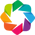

In [3]:
gv.extension('bokeh')

# Step 1.  Load data



### SNOTEL Sites info

In [4]:
snotel = {"AZ" : "arizona",
          "CO" : "colorado",
          "ID" : "idaho",
          "MT" : "montana", 
          "NM" : "newmexico",
          "UT" : "utah",
          "WY" : "wyoming"}

In [5]:
def load_site(state):
    s3 = s3fs.S3FileSystem()
    
    bucket = "s3://eis-dh-hydro/SNOW/SNOTEL"
    key = f"snotel_{state}.csv"
    df = pd.read_csv(s3.open(f'{bucket}/{key}', mode='r'))
    
    return df 

### SNOTEL Depth & SWE

In [6]:
s3 = s3fs.S3FileSystem()
def load_snotel_txt(state, var):

    bucket = "s3://eis-dh-hydro"
    key = f"SNOW/SNOTEL/snotel_{state}{var}_20162020.txt"

    fh = s3.open(f"{bucket}/{key}")
    lines = fh.readlines()
    skips = sum(1 for ln in lines if ln.decode('ascii').startswith('#'))
    
    df = pd.read_csv(s3.open(f"{bucket}/{key}"), skiprows=skips)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [7]:
snotel.keys()

dict_keys(['AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY'])

In [8]:
# depth & swe in dictionary
snotel_depth = {}
snotel_swe = {}
for state in snotel.keys():
    print(f"Loading state {state}")
    snotel_depth[state] = load_snotel_txt(state, 'depth')
    snotel_swe[state] = load_snotel_txt(state, 'swe') 

Loading state AZ
Loading state CO
Loading state ID
Loading state MT
Loading state NM
Loading state UT
Loading state WY


### SNODAS Depth & SWE

In [9]:
bucket = "eis-dh-hydro"

#snodas depth
key = "SNOW/SNODAS/snodas_snowdepth_20161001_20200930.zarr"    
snodas_depth = xr.open_zarr(s3.get_mapper(f"{bucket}/{key}"), consolidated=True)

#snodas swe
key = "SNOW/SNODAS/snodas_swe_20161001_20200930.zarr"
snodas_swe = xr.open_zarr(s3.get_mapper(f"{bucket}/{key}"), consolidated=True)

### LIS model outputs

In [10]:
def add_latlon_coords(dataset: xr.Dataset)->xr.Dataset:
    """Adds lat/lon as dimensions and coordinates to an xarray.Dataset object."""
    
    # get attributes from dataset
    attrs = dataset.attrs
    
    # get x, y resolutions
    dx = round(float(attrs['DX']), 3)
    dy = round(float(attrs['DY']), 3)
    
    # get grid cells in x, y dimensions
    ew_len = len(dataset['east_west'])
    ns_len = len(dataset['north_south'])
    
    # get lower-left lat and lon
    ll_lat = round(float(attrs['SOUTH_WEST_CORNER_LAT']), 3)
    ll_lon = round(float(attrs['SOUTH_WEST_CORNER_LON']), 3)
    
    # calculate upper-right lat and lon
    ur_lat =  ll_lat + (dy * ns_len)
    ur_lon = ll_lon + (dx * ew_len)
    
    # define the new coordinates
    coords = {
        # create an arrays containing the lat/lon at each gridcell
        'lat': np.linspace(ll_lat, ur_lat, ns_len, dtype=np.float32, endpoint=False),
        'lon': np.linspace(ll_lon, ur_lon, ew_len, dtype=np.float32, endpoint=False)
    }
    
   
    # drop the original lat and lon variables
    dataset = dataset.rename({'lon': 'orig_lon', 'lat': 'orig_lat'})
    # rename the grid dimensions to lat and lon
    dataset = dataset.rename({'north_south': 'lat', 'east_west': 'lon'})
    # assign the coords above as coordinates
    dataset = dataset.assign_coords(coords)
    # reassign variable attributes
    dataset.lon.attrs = dataset.orig_lon.attrs
    dataset.lat.attrs = dataset.orig_lat.attrs
    
    return dataset

In [11]:
# LIS surfacemodel DA_10km
key = "LIS/DA_10km/SNODAS/SURFACEMODEL/LIS_HIST.d01.zarr"

lis_sf = xr.open_zarr(s3.get_mapper(f"{bucket}/{key}"), consolidated=True)

# (optional for 10km simulation?)
lis_sf = add_latlon_coords(lis_sf)

# drop off irrelevant variables
drop_vars = ['_history', '_eis_source_path', 'orig_lat', 'orig_lon']
lis_sf = lis_sf.drop(drop_vars)
lis_sf

<xarray.Dataset>
Dimensions:           (SoilMoist_profiles: 4, lat: 215, lon: 361, time: 5997)
Coordinates:
  * time              (time) datetime64[ns] 2004-02-01 2004-02-02 ... 2020-07-02
  * lat               (lat) float32 28.55 28.65 28.75 ... 49.75 49.85 49.95
  * lon               (lon) float32 -113.9 -113.8 -113.8 ... -78.05 -77.95
Dimensions without coordinates: SoilMoist_profiles
Data variables: (12/20)
    Albedo_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    CanopInt_tavg     (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ECanop_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ESoil_tavg        (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    GPP_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    LAI_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ...                ...
    SnowDepth_tavg    (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    Snowcover_tavg    (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    SoilMoist_tavg    (time, SoilMoist_profiles, lat, lon) float32 dask.array<chunksize=(1, 4, 215, 361), meta=np.ndarray>
    TVeg_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    TWS_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    TotalPrecip_tavg  (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
Attributes: (12/14)
    DX:                      0.10000000149011612
    DY:                      0.10000000149011612
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [10.0, 30.000001907348633, 60.000003814697266, 1...
    SOUTH_WEST_CORNER_LAT:   28.549999237060547
    ...                      ...
    conventions:             CF-1.6
    institution:             NASA GSFC
    missing_value:           -9999.0
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    source:                  Noah-MP.4.0.1
    title:                   LIS land surface model output

In [12]:
# subset LIS data for two years  
time_range = slice('2016-10-01', '2018-09-30')
lis_sf = lis_sf.sel(time=time_range)

#### !! Note: next cell will take about 5min and 6GB RAM; use with caution  

In [13]:
%%time
# persist LIS data in memory
lis_sf.persist()

CPU times: user 1min 14s, sys: 10 s, total: 1min 24s
Wall time: 4min 5s


<xarray.Dataset>
Dimensions:           (SoilMoist_profiles: 4, lat: 215, lon: 361, time: 730)
Coordinates:
  * time              (time) datetime64[ns] 2016-10-01 2016-10-02 ... 2018-09-30
  * lat               (lat) float32 28.55 28.65 28.75 ... 49.75 49.85 49.95
  * lon               (lon) float32 -113.9 -113.8 -113.8 ... -78.05 -77.95
Dimensions without coordinates: SoilMoist_profiles
Data variables: (12/20)
    Albedo_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    CanopInt_tavg     (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ECanop_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ESoil_tavg        (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    GPP_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    LAI_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    ...                ...
    SnowDepth_tavg    (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    Snowcover_tavg    (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    SoilMoist_tavg    (time, SoilMoist_profiles, lat, lon) float32 dask.array<chunksize=(1, 4, 215, 361), meta=np.ndarray>
    TVeg_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    TWS_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
    TotalPrecip_tavg  (time, lat, lon) float32 dask.array<chunksize=(1, 215, 361), meta=np.ndarray>
Attributes: (12/14)
    DX:                      0.10000000149011612
    DY:                      0.10000000149011612
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [10.0, 30.000001907348633, 60.000003814697266, 1...
    SOUTH_WEST_CORNER_LAT:   28.549999237060547
    ...                      ...
    conventions:             CF-1.6
    institution:             NASA GSFC
    missing_value:           -9999.0
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    source:                  Noah-MP.4.0.1
    title:                   LIS land surface model output

In [14]:
# gather metadata from LIS

# get variable names:string
vnames = list(lis_sf.data_vars)
print(vnames)

# get time-stamps:string
tstamps = list(np.datetime_as_string(lis_sf.time.values, 'D'))
print(len(tstamps), tstamps[0], tstamps[-1])

['Albedo_tavg', 'CanopInt_tavg', 'ECanop_tavg', 'ESoil_tavg', 'GPP_tavg', 'LAI_tavg', 'NEE_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qs_tavg', 'Qsb_tavg', 'RadT_tavg', 'SWE_tavg', 'SnowDepth_tavg', 'Snowcover_tavg', 'SoilMoist_tavg', 'TVeg_tavg', 'TWS_tavg', 'TotalPrecip_tavg']
730 2016-10-01 2018-09-30


In [15]:
%%time
# pre-load min/max range for LIS variables
def get_cmap_range(vns):
    vals = [(lis_sf[x].sel(time='2016-12').min(skipna=True).values.item(),
        lis_sf[x].sel(time='2016-12').max(skipna=True).values.item()) for x in vns]
    return dict(zip(vns, vals))

cmap_lims = get_cmap_range(vnames)

CPU times: user 6.86 s, sys: 809 ms, total: 7.67 s
Wall time: 17.6 s


# Step 2. Plot Site Map and Timeseries

In [16]:
# get snotel depth
def get_depth(state, site, ts, te):
    df = snotel_depth[state]
    
    # subset between time range
    mask = (df['Date'] >= ts) & (df['Date'] <= te)
    df = df.loc[mask]
    
    # extract timeseries for the site
    return pd.concat([df.Date, df.filter(like=site)], axis=1).set_index('Date')

# get snotel swe
def get_swe(state, site, ts, te):
    df = snotel_swe[state]
    
    # subset between time range
    mask = (df['Date'] >= ts) & (df['Date'] <= te)
    df = df.loc[mask]
    
    # extract timeseries for the site
    return pd.concat([df.Date, df.filter(like=site)], axis=1).set_index('Date')

# co-locate site & LIS model cell
def nearest_grid(pt):
    # pt : input point, tuple (longtitude, latitude)
    # output:
    #        x_idx, y_idx 
    loc_valid = df_loc.dropna()
    pts = loc_valid[['lon', 'lat']].to_numpy()
    idx = distance.cdist([pt], pts).argmin()

    return loc_valid['east_west'].iloc[idx], loc_valid['north_south'].iloc[idx]

# get LIS variable 
def var_subset(dset, v, lon, lat, ts, te):
    return dset[v].sel(lon=lon, lat=lat, method="nearest").sel(time=slice(ts, te)).load()

# line plots
def line_callback(index, state, vname, ts_tag, te_tag):
    sites = load_site(snotel[state])
    row = sites.iloc[0]
    
    tmp = var_subset(lis_sf, vname, row.lon, row.lat, ts_tag, te_tag) 
    xr_sf = xr.zeros_like(tmp)
    
    xr_snodas = xr_sf
    
    ck = get_depth(state, row.site_name, ts_tag, te_tag).to_xarray().rename({'Date': 'time'})
    xr_snotel = xr.zeros_like(ck)
    
    if not index:
        title='Var: -- Lon: -- Lat: --'
        return (xr_sf.hvplot(title=title, color='blue', label='LIS') \
                * xr_snotel.hvplot(color='red', label='SNOTEL') \
                * xr_snodas.hvplot(color='green', label='SNODAS')).opts(legend_position='right')
        

    else:
        sites = load_site(snotel[state])
        first_index = index[0]
        row = sites.iloc[first_index]
    
        
        xr_sf = var_subset(lis_sf, vname, row.lon, row.lat, ts_tag, te_tag)
    
        vs = vname.split('_')[0]
        title=f'Var: {vs} Lon: {row.lon} Lat: {row.lat}'

        
        # update snotel data 
        if 'depth' in vname.lower():
            xr_snotel =  get_depth(state, row.site_name, ts_tag, te_tag).to_xarray().rename({'Date': 'time'})*0.01
            xr_snodas =  var_subset(snodas_depth, 'SNOWDEPTH', row.lon, row.lat, ts_tag, te_tag)*0.001
        
        if 'swe' in vname.lower():
            xr_snotel =  get_swe(state, row.site_name, ts_tag, te_tag).to_xarray().rename({'Date': 'time'})
            xr_snodas =  var_subset(snodas_swe, 'SWE', row.lon, row.lat, ts_tag, te_tag)

    
        return xr_sf.hvplot(title=title, color='blue', label='LIS') \
               * xr_snotel.hvplot(color='red', label='SNOTEL') \
               * xr_snodas.hvplot(color='green', label='SNODAS')



In [17]:
# sites on map
def plot_points(state):  
    # dataframe to hvplot obj Points
    sites=load_site(snotel[state])
    pts_opts=dict(size=12, nonselection_alpha=0.4,tools=['tap', 'hover'])
    site_points=sites.hvplot.points(x='lon', y='lat', c='elev', cmap='fire', geo=True, hover_cols=['site_name', 'ntwk', 'state', 'lon', 'lat']).opts(**pts_opts)  
    return site_points

# base map
tiles = gvts.OSM()

# state widget
state_select = pn.widgets.Select(options=list(snotel.keys()), name="State")
state_stream = Params(state_select, ['value'], rename={'value':'state'})

# variable widget
var_select = pn.widgets.Select(options=['SnowDepth_tavg', 'SWE_tavg'], name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})

# date range
date_fmt = '%Y-%m-%d'
sdate_input = pn.widgets.DatetimeInput(name='Start date', value=dt(2016,10,1),start=dt.strptime(tstamps[0], date_fmt), end=dt.strptime(tstamps[-1], date_fmt), format=date_fmt)
sdate_stream = Params(sdate_input, ['value'], rename={'value':'ts_tag'})
edate_input = pn.widgets.DatetimeInput(name='End date', value=dt(2017,3,31),start=dt.strptime(tstamps[0], date_fmt), end=dt.strptime(tstamps[-1], date_fmt),format=date_fmt)
edate_stream = Params(edate_input, ['value'], rename={'value':'te_tag'})

# generate site points as dynamic map
site_dmap = hv.DynamicMap(plot_points, streams=[state_stream]).opts(height=400, width=600)
# pick site 
select_stream = Selection1D(source=site_dmap)


line = hv.DynamicMap(line_callback, streams=[select_stream, state_stream, var_stream, sdate_stream, edate_stream])
pn.Row(site_dmap*tiles, pn.Column(state_select, var_select, pn.Row(sdate_input, edate_input), line))

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] Select(name='State', options=['AZ', 'CO', 'ID', ...], value='AZ')
        [1] Select(name='LIS Variable List', options=['SnowDepth_tavg', ...], value='SnowDepth_tavg')
        [2] Row
            [0] DatetimeInput(end=datetime.datetime(2018, ..., format='%Y-%m-%d', name='Start date', start=datetime.datetime(2016, ..., type=<class 'datetime.datetime'..., value=datetime.datetime(2016, ...)
            [1] DatetimeInput(end=datetime.datetime(2018, ..., format='%Y-%m-%d', name='End date', start=datetime.datetime(2016, ..., type=<class 'datetime.datetime'..., value=datetime.datetime(2017, ...)
        [3] HoloViews(DynamicMap)

# LIS Map

In [18]:
# date widget (slider & key in)
date_fmt = '%Y-%m-%d'
b = dt.strptime('2016-10-01', date_fmt)
e = dt.strptime('2018-09-30', date_fmt)

date_slider = pn.widgets.DateSlider(start=b, end=e, value=b, name="LIS Model Date")
dt_input = pn.widgets.DatetimeInput(name='LIS Model Date Input', value=b, format=date_fmt)
date_stream = Params(date_slider, ['value'], rename={'value':'date'})

# variable widget
var_select = pn.widgets.Select(options=vnames, name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})


#date_select= pn.widgets.DiscreteSlider(options=tstamps, name="LIS Model Date")

# base map
map_layer= pn.widgets.RadioButtonGroup(
    name='Base map layer',
    options=['Open Street Map', 'Satellite Imagery'],
    value='Satellite Imagery',
    button_type='primary',
    background='#f307eb')

def var_layer(vname, date):
    t_stamp = dt.strftime(date, '%Y-%m-%d')
    dssm = lis_sf[vname].sel(time=t_stamp)

    image = dssm.hvplot(geo=True)
    clim = cmap_lims[vname]
    return image.opts(clim=clim)

@pn.depends(dt_input.param.value, watch=True)
def _update_date(dt_input):
    date_slider.value=dt_input

def update_map(maps):
    tile = gvts.OSM if maps=='Open Street Map' else gvts.EsriImagery
    return tile.opts(alpha=0.7)

streams = dict(vname=var_select.param.value, date=date_slider.param.value)        
dmap = hv.DynamicMap(var_layer, streams=streams)
dtile = hv.DynamicMap(update_map, streams=dict(maps=map_layer.param.value))
pn.Column(var_select, date_slider, dt_input, map_layer,
          dtile*rasterize(dmap, aggregator=datashader.mean()).opts(cmap=viridis,colorbar=True,width=800, height=600))


Column
    [0] Select(name='LIS Variable List', options=['Albedo_tavg', ...], value='Albedo_tavg')
    [1] DateSlider(end=datetime.datetime(2018, ..., name='LIS Model Date', start=datetime.datetime(2016, ..., value=datetime.datetime(2016, ...)
    [2] DatetimeInput(format='%Y-%m-%d', name='LIS Model Date Input', type=<class 'datetime.datetime'..., value=datetime.datetime(2016, ...)
    [3] RadioButtonGroup(background='#f307eb', button_type='primary', name='Base map layer', options=['Open Street Map', ...], value='Satellite Imagery')
    [4] HoloViews(DynamicMap)